# Exercício de correlação (11/09)

Uma firma avalia seus vendedores com notas de 0 a 100. Deseja-se ajustar um
modelo que explique as vendas em função das notas.

1. Verificar se a hipótese nula para β_1 = 0 pode ser rejeitada 1_F_8(0,05) = 5,32

2. Verificar se a hipótese nula para ρ(x, y) = 0 pode ser rejeitada 1_t_8(0,05) = 2,31

In [23]:
import numpy as np
import matplotlib.pyplot as plt

scores = [90, 75, 80, 65, 85, 90, 95, 75, 20, 60] # eixo x
sales = [1.1, 1.2, 1.6, 0.7, 2.1, 2.7, 2.4, 0.7, 0.6, 0.9] # eixo y

1.1. Achar a reta da regressão linear

======== Resultado da regressão linear =========

y = -0.33 + 0.02x
β_0 = -0.33
β_1 = 0.02


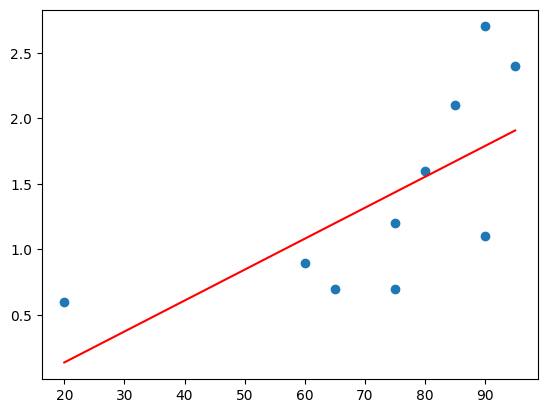

In [24]:
x_mean = np.mean(scores)
y_mean = np.mean(sales)
N = len(scores)

numerator = 0
denominator = 0
for i in range(N):
    numerator += sales[i] * (scores[i] - x_mean)
    denominator += (scores[i] - x_mean) ** 2

b_1 = numerator / denominator
b_0 = y_mean - b_1 * x_mean

print('======== Resultado da regressão linear =========\n')
print(f'y = {b_0:.2f} + {b_1:.2f}x')
print(f'β_0 = {b_0:.2f}')
print(f'β_1 = {b_1:.2f}')

plt.scatter(scores, sales)
plt.plot([min(scores), max(scores)], [b_0 + b_1 * (min(scores)), b_0 + b_1 * (max(scores))], color='red')
plt.show()

1.2. Fazer teste de hipótese para 99,5% de significância:

1_F_8(0,05) = 5,32\
H_0: β_1 = 0\
H_1: β_1 != 0



In [25]:
SQE = 0
SQReg = 0

for i in range(N):
    SQE += (sales[i] - b_0 - b_1 * scores[i]) ** 2
    SQReg += (b_0 + b_1 * scores[i] - y_mean) ** 2

F_0 = (SQReg / 1) / (SQE / (N - 2))

print('======== Resultado do teste de hipótese =========\n')

print(f'SQReg = {SQReg:.2f}')
print(f'SQE = {SQE:.2f}')
print(f'SQT = {(SQE + SQReg):.2f}')
print(f'F_0 = {F_0:.2f}')

F_1_8 = 5.32

if F_0 > F_1_8:
    print('Hipótese nula rejeitada. Modelo MRLS é o que melhor se encaixa nos pontos.')
else:
    print('Hipótese nula não rejeitada.')

======== Resultado do teste de hipótese =========

SQReg = 2.39
SQE = 2.83
SQT = 5.22
F_0 = 6.78
Hipótese nula rejeitada. Modelo MRLS é o que melhor se encaixa nos pontos.


2.1. Calcular coeficiente de correlação

In [26]:
SXX = 0
SYY = 0
SXY = 0

for i in range(N):
    SXX += (scores[i] - x_mean) ** 2
    SYY += (sales[i] - y_mean) ** 2
    SXY += (scores[i] - x_mean) * (sales[i] - y_mean)

p = SXY / ((SXX * SYY) ** 0.5)

print('======== Resultado do coeficiente de correlação =========\n')
print(f'p = {p:.2f}')

======== Resultado do coeficiente de correlação =========

p = 0.68


2.2. Teste de hipótese com t-student com (N-2) graus de liberdade:

1_t_8(0,05) = 2,31\
H_0: p(x,y) = 0\
H_1: p(x,y) != 0

In [27]:
T = p * ((N - 2) ** 0.5) / ((1 - p ** 2) ** 0.5)

print('======== Resultado do teste de hipótese =========\n')
print(f'T = {T:.2f}')

T_1_8 = 2.31

if T > T_1_8:
    print('Hipótese nula rejeitada. Existem relações entre as variáveis.')
else:
    print('Hipótese nula não rejeitada.')

======== Resultado do teste de hipótese =========

T = 2.60
Hipótese nula rejeitada. Existem relações entre as variáveis.
